## Embedding variables in Markdown cells
This is done by installing the [Jupyter notebook extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) and activating the [Python Markdown](https://jupyter-contrib-nbextensions.readthedocs.io/en/stable/nbextensions/python-markdown/readme.html) extension. It is then easy to include variables in the Markdown cells by including them between two curly brackets.

In [5]:
# Example
import sympy
q, r, p, k, mu, h, u = sympy.symbols('q r p k \mu h u')
mu

\mu

In [6]:
P = sympy.Function("P")
dpdr = sympy.Derivative(P(r), r)
u = -k/mu*dpdr

In [7]:
u

-k*Derivative(P(r), r)/\mu

In [8]:
sol1 = sympy.dsolve(u-q/(2*sympy.pi*r*h), P(r))

## A markdown cell
The solution to the above differential equation for radial flow is {{sol1}}

## Creating diagrams using Graphviz
First, install `Graphviz` and add it to the path (on windows). Then, install the python package `graphviz`. Then the following should work:

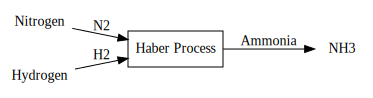

In [1]:
from graphviz import Digraph

f = Digraph('Process flow diagram', format='svg', filename='fsm.gv')
f.attr(rankdir='LR', size='6,4')

f.attr('node', shape = 'none')
f.node('N2', label = 'Nitrogen')
f.node('H2', label = 'Hydrogen')
f.node('NH3')

f.attr('node', shape='rectangle')
f.node('HP', label='Haber Process')

f.edge('N2', 'HP', label='N2')
f.edge('H2', 'HP', label='H2')
f.edge('HP', 'NH3', label='Ammonia')

f.render()
f

### Note on graphviz installation
If you are using `conda`, then install it by `conda install python-graphviz`. Otherwise, use `pip install graphviz` and install the graphviz program (not the python package) yourself.

## Using thermo package
I installed [thermo](https://github.com/CalebBell/thermo) package to calculate the enthaply and gibbs energy of reactions. [CoolProp](https://github.com/CoolProp/CoolProp) does not have the enthaply of formation in its database. There is an issue with the `thermo` package on windows. It seems to be a problem with the version of `Scipy` that comes with the conda package, that gives me an error. I will open an issue on github and see if the problem can be solved. Until a good solution is found, I might try to create a tiny database for the material of this course. I actually have one and only need to read it in python. The file is in Matlab `.mat` format. I can read it [using scipy](https://stackoverflow.com/questions/874461/read-mat-files-in-python).

In [2]:
# read the mat file
import scipy.io
mat = scipy.io.loadmat('../data/puredata.mat')

In [91]:
import numpy as np

In [50]:
# read the required data from the mat file
Tc = mat['critical_temperature_data'].squeeze()
Pc = mat['critical_pressure_data'].squeeze()
dh_form_ig = mat['dh_formation_ig'].squeeze()
dg_form_ig = mat['dg_formation_ig'].squeeze()
ds_form_ig = mat['ds_ideal_gas'].squeeze()
dh_combustion = mat['dh_combustion'].squeeze()

size = Tc.size
component_formula = [mat['component_formula'][x][0][0] for x in range(size)]
component_name = [mat['component_name'][x][0][0] for x in range(size)]


In [68]:
# Note
try:
    ind_name = component_formula.index('NH3')
except:
    print('not found')
ind_name
# but it is much easier in pandas

215

In [69]:
# Create a pandas dataframe
import pandas as pd

In [70]:
thermo_dict = {'name': component_name, 'formula': component_formula, 'Tc': Tc, 'Pc': Pc, 'dh_form': dh_form_ig, 
               'dh_comb': dh_combustion, 'dg_form': dg_form_ig, 'ds_form': ds_form_ig}

thermo_data = pd.DataFrame(thermo_dict)

In [81]:
thermo_data.to_csv('../data/thermo_data.csv')

In [94]:
df = thermo_data.loc[thermo_data['formula'].isin(['NH3', 'N2'])]
df

,name,formula,Tc,Pc,dh_form,dh_comb,dg_form,ds_form
214,Nitrogen,N2,126.20,3390000.0,0.0,0.0,0.0,191.50
215,Ammonia,NH3,405.65,11300000.0,-45898.0,-316800.0,-16400.0,192.66


In [96]:
df_dict = df.to_dict()
df_dict

{'name': {214: 'Nitrogen', 215: 'Ammonia'},
 'formula': {214: 'N2', 215: 'NH3'},
 'Tc': {214: 126.2, 215: 405.65},
 'Pc': {214: 3390000.0, 215: 11300000.0},
 'dh_form': {214: 0.0, 215: -45898.0},
 'dh_comb': {214: 0.0, 215: -316800.0},
 'dg_form': {214: 0.0, 215: -16400.0},
 'ds_form': {214: 191.5, 215: 192.66}}

In [103]:
# to get a value, e.g., dh_from based on name or formula
float(thermo_data.loc[(thermo_data['name']=='NH3') | (thermo_data['formula']=='NH3')]['dh_form'])

-45898.0

I have create a simple python module that extracts the required properties from the database. It can be used this way:

In [116]:
cd /home/ali/projects/energystorage/data/

/home/ali/projects/energystorage/data


In [143]:
import thermo_data_simple as tds
from importlib import reload
reload(tds)

<module 'thermo_data_simple' from '/home/ali/projects/energystorage/data/thermo_data_simple.py'>

In [144]:
tds.get_property('NH3', 'dh_form')

-45898.0

In [145]:
tds.available_property

['name', 'formula', 'Tc', 'Pc', 'dh_form', 'dh_comb', 'dg_form', 'ds_form']